(0, 0.4)

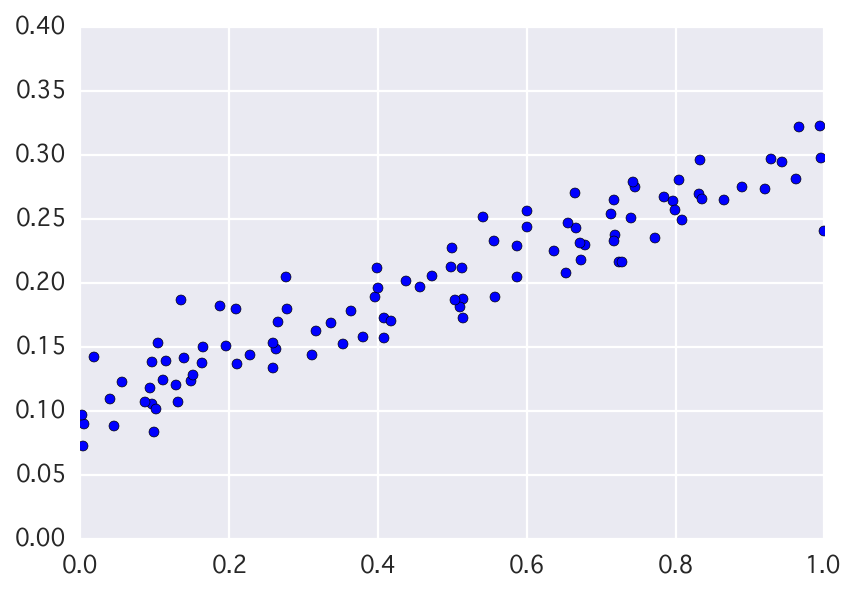

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# http://www.tensorflow.org/get_started
x_data = np.float32(np.random.rand(1, 100)) # Random input
noise = np.random.normal(scale=0.02, size=(1, 100))
y_data = 0.2 * x_data + 0.1 + noise

plt.scatter(x_data[0], y_data[0])
plt.xlim(0, 1.0)
plt.ylim(0, 0.4)

このようなデータに合うような、y = a x + b のような直線を引く、a、bを求めたい(正解はa=0.2, b=0.1)

In [39]:
# Construct a linear model.
b = tf.Variable(tf.zeros([1]))
a = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0, seed=1))
y = tf.matmul(a, x_data) + b

# Minimize the squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# For initializing the variables.
init = tf.initialize_all_variables()

# Launch the graph
sess = tf.Session()
sess.run(init)

# Fit the plane.
result = []  # a, b, y
for step in range(0, 150):
    sess.run(train)
    a_, b_ = sess.run(a), sess.run(b)
    y_ = sess.run(y)
    
    if step % 10 == 0:
        print(a_, b_)
        result.append((a_, b_, y_))


(array([[-0.50891137]], dtype=float32), array([ 0.61381036], dtype=float32))
(array([[-0.17971838]], dtype=float32), array([ 0.2943469], dtype=float32))
(array([[ 0.01212709]], dtype=float32), array([ 0.19776683], dtype=float32))
(array([[ 0.10627113]], dtype=float32), array([ 0.15037228], dtype=float32))
(array([[ 0.15247031]], dtype=float32), array([ 0.12711442], dtype=float32))
(array([[ 0.17514154]], dtype=float32), array([ 0.11570113], dtype=float32))
(array([[ 0.18626696]], dtype=float32), array([ 0.11010031], dtype=float32))
(array([[ 0.19172652]], dtype=float32), array([ 0.10735182], dtype=float32))
(array([[ 0.19440567]], dtype=float32), array([ 0.10600306], dtype=float32))
(array([[ 0.1957204]], dtype=float32), array([ 0.1053412], dtype=float32))
(array([[ 0.19636558]], dtype=float32), array([ 0.1050164], dtype=float32))
(array([[ 0.1966822]], dtype=float32), array([ 0.10485701], dtype=float32))
(array([[ 0.19683757]], dtype=float32), array([ 0.10477878], dtype=float32))
(arr

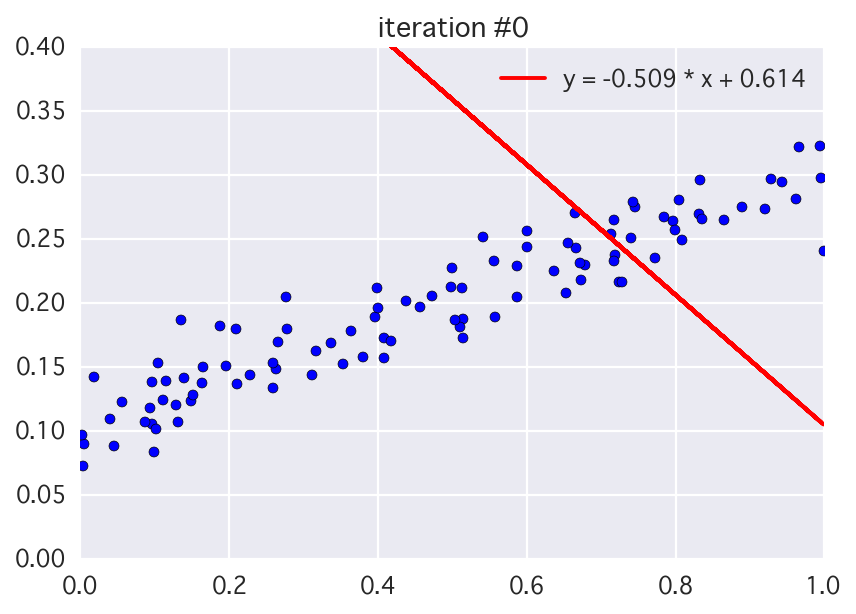

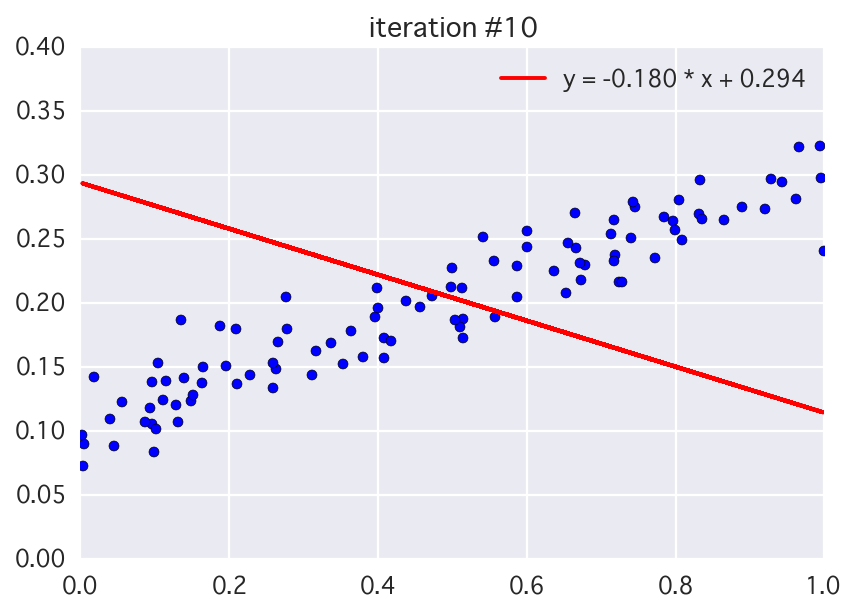

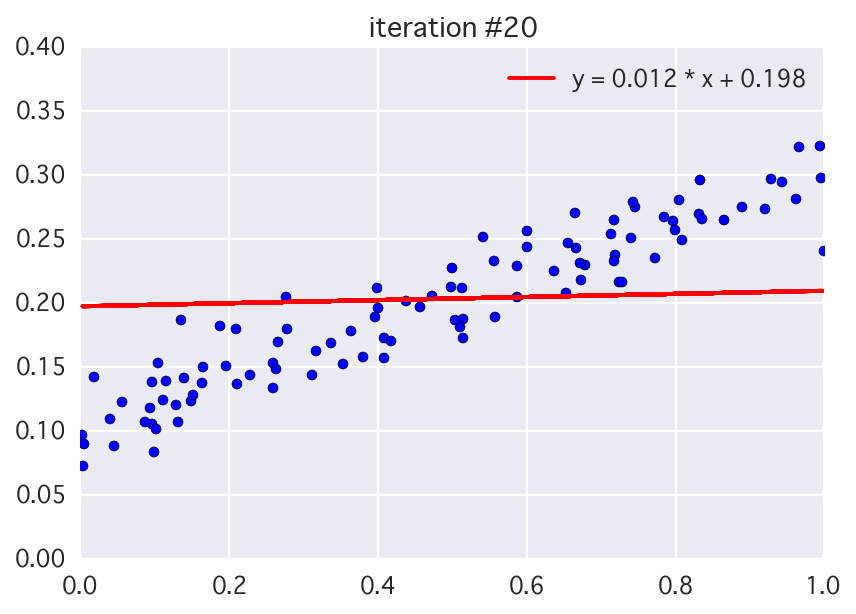

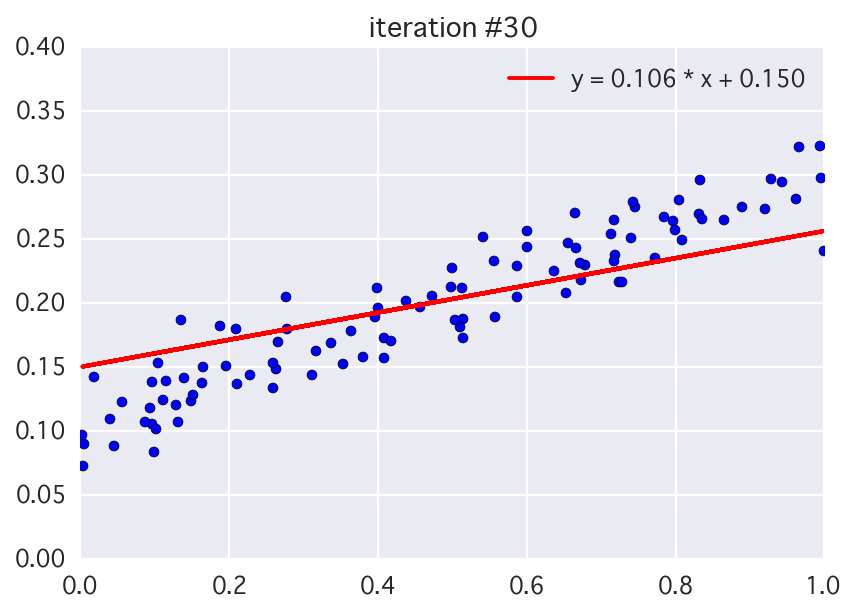

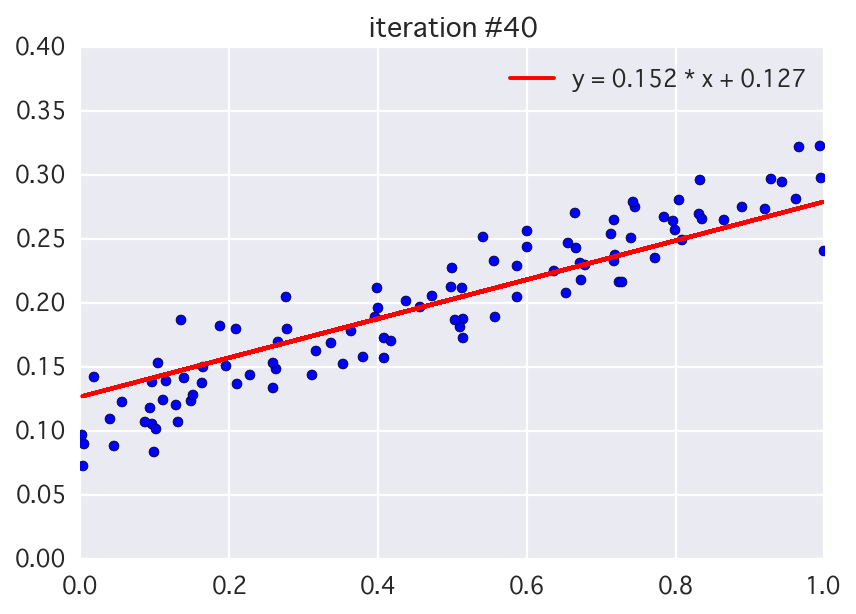

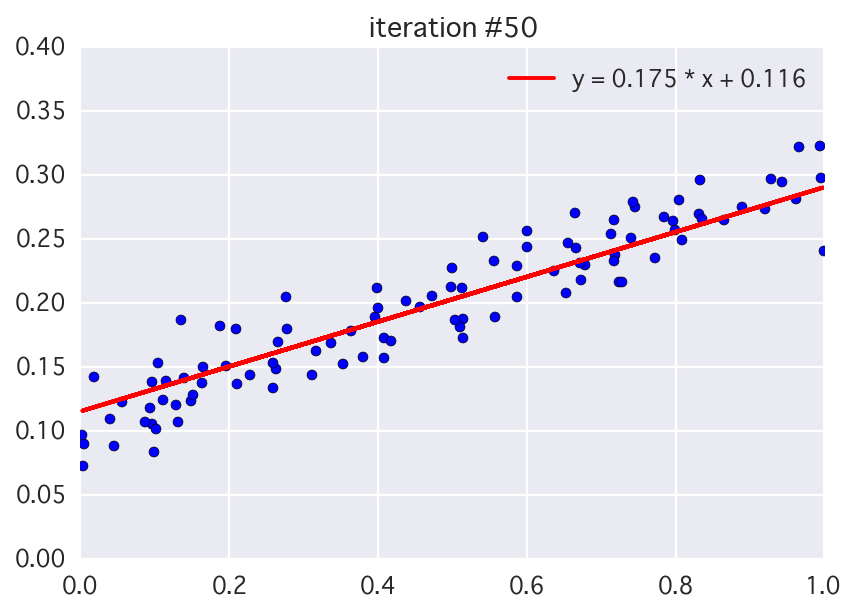

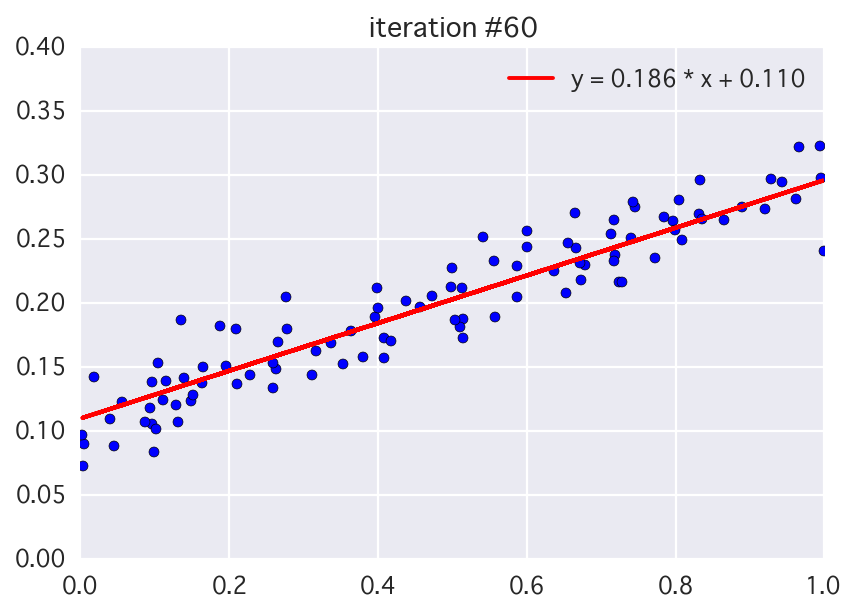

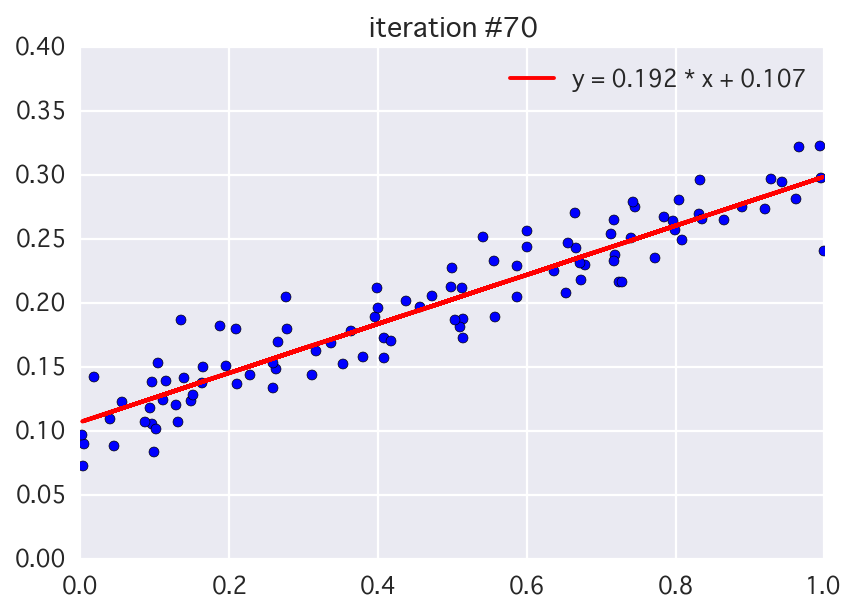

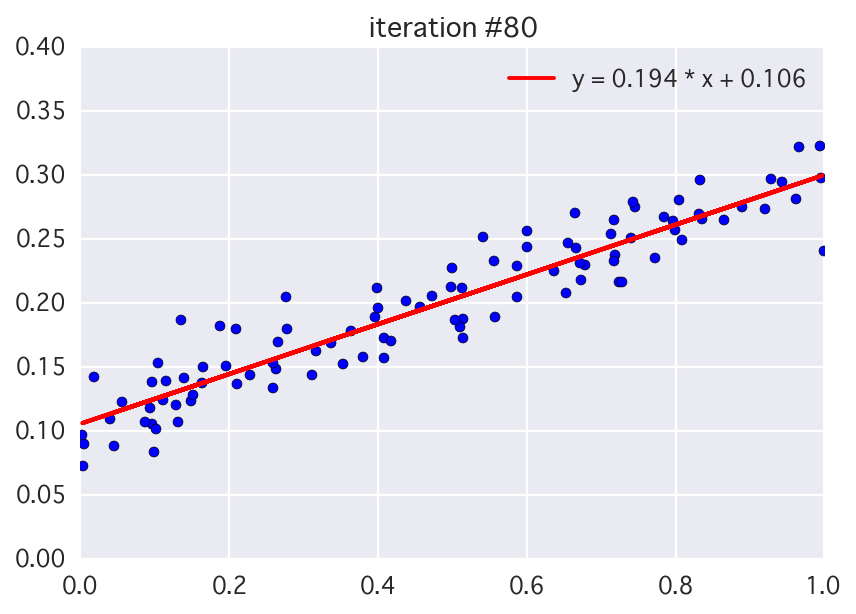

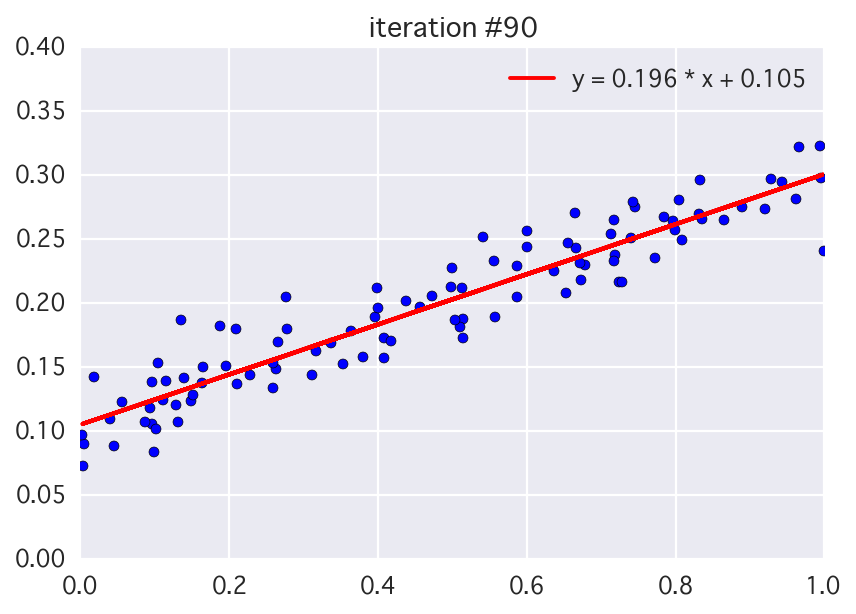

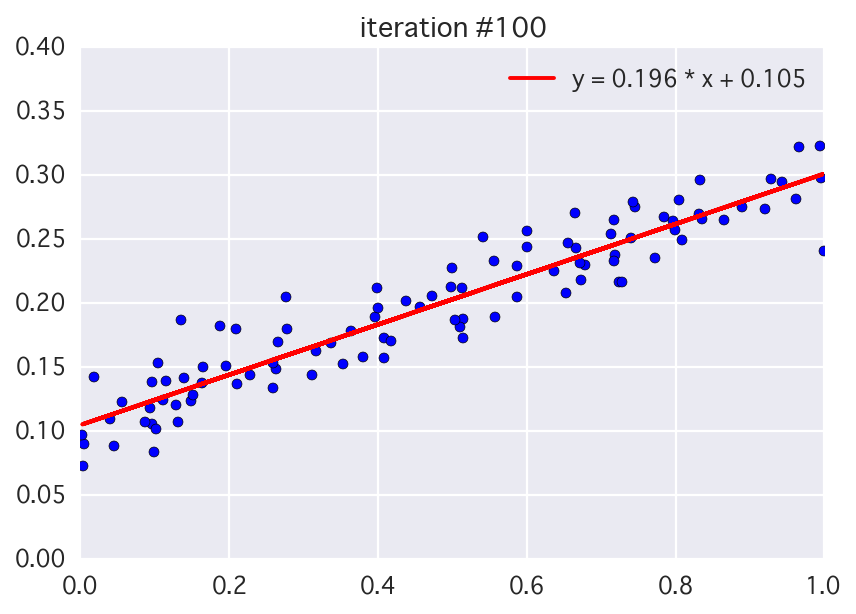

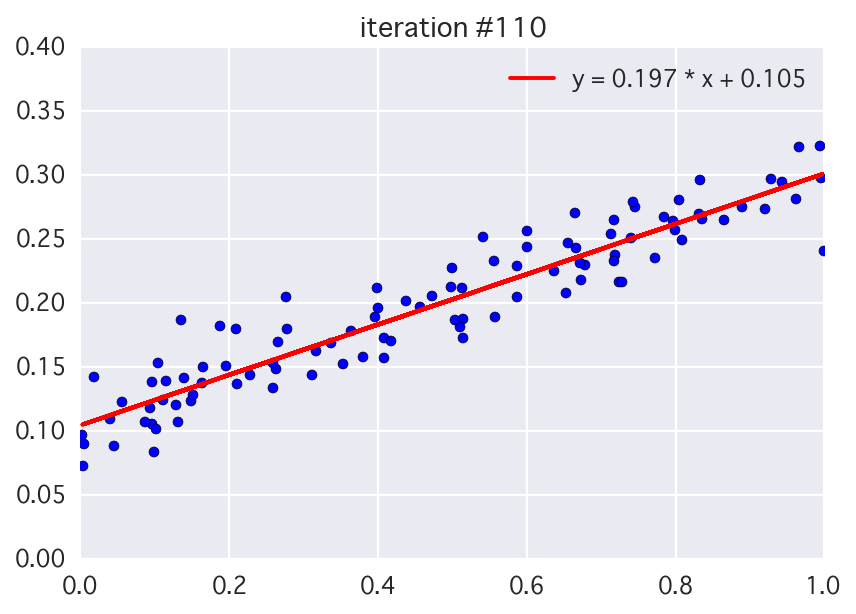

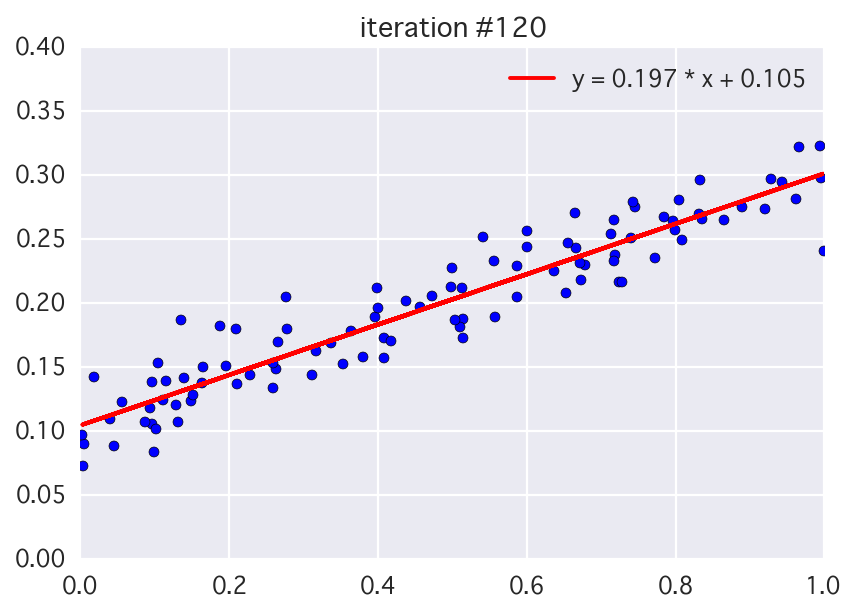

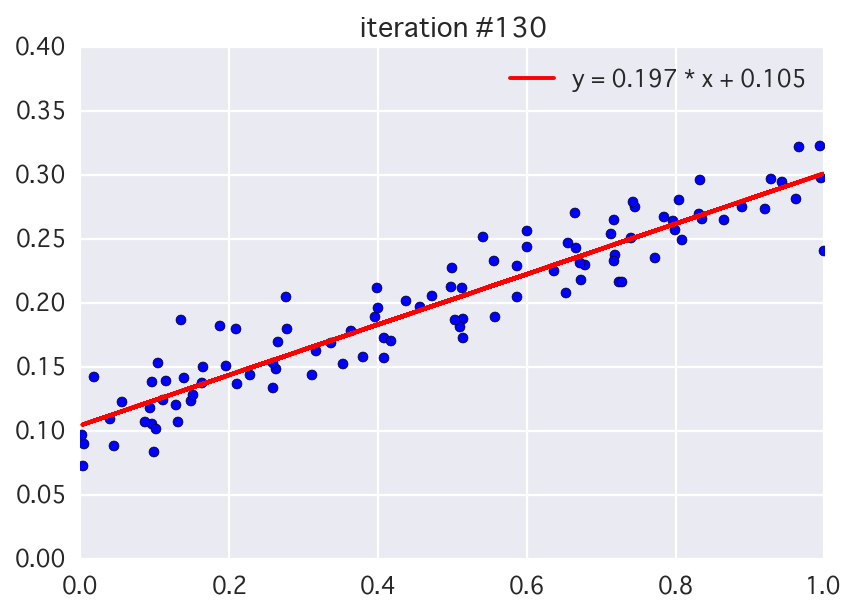

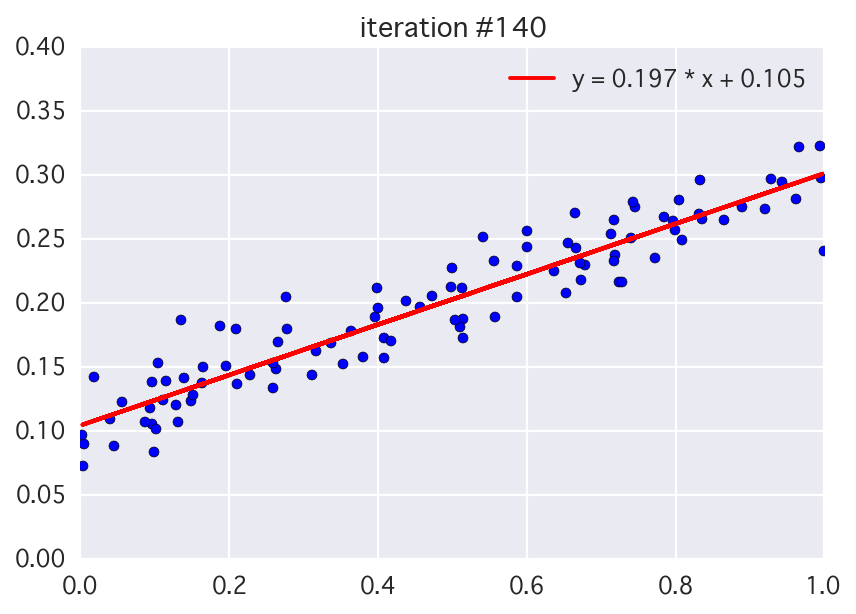

In [44]:
for i, (a_, b_, y_) in enumerate(result):
    plt.figure()
    plt.scatter(x_data[0], y_data[0])
    plt.plot(x_data[0], y_[0], label='y = %.3f * x + %.3f' % (a_, b_), c='r')
    plt.title("iteration #%d" % (i * 10))
    plt.legend()
    plt.xlim(0, 1.0)
    plt.ylim(0, 0.4)

回帰できた！